# Oasis Infobyte (Data Science Internship)
## Task 5
## Sales Prediction
### By Saugata Panja

## 1. Loading dataset

In [69]:
# importing pandas to read the dataset
import pandas as pd
#Reading the Iris dataset through pandas
data=pd.read_csv("Advertising.csv")
df=pd.DataFrame(data)

#Printing the dataset
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## 2. Dataset analysis and Cleaning

As 'Unnamed: 0' column is unnecessary, we will remove it.

In [70]:
df=df.drop(['Unnamed: 0'],axis=1)

In [71]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [72]:
# Checking shape of dataset
df.shape


(200, 4)

In [73]:
# Printing coulums' name
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [74]:
# Description of the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [75]:
# Info about the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [76]:
# Checking for null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [77]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


### As all columns has numerical values, we do not need encoding.

## 3. Data Visualization

TV: -0.06985336213274573
Axes(0.125,0.11;0.168478x0.77)
Radio: 0.09417463149664404
Axes(0.327174,0.11;0.168478x0.77)
Newspaper: 0.8947204074986175
Axes(0.529348,0.11;0.168478x0.77)
Sales: 0.4075714250767127
Axes(0.731522,0.11;0.168478x0.77)


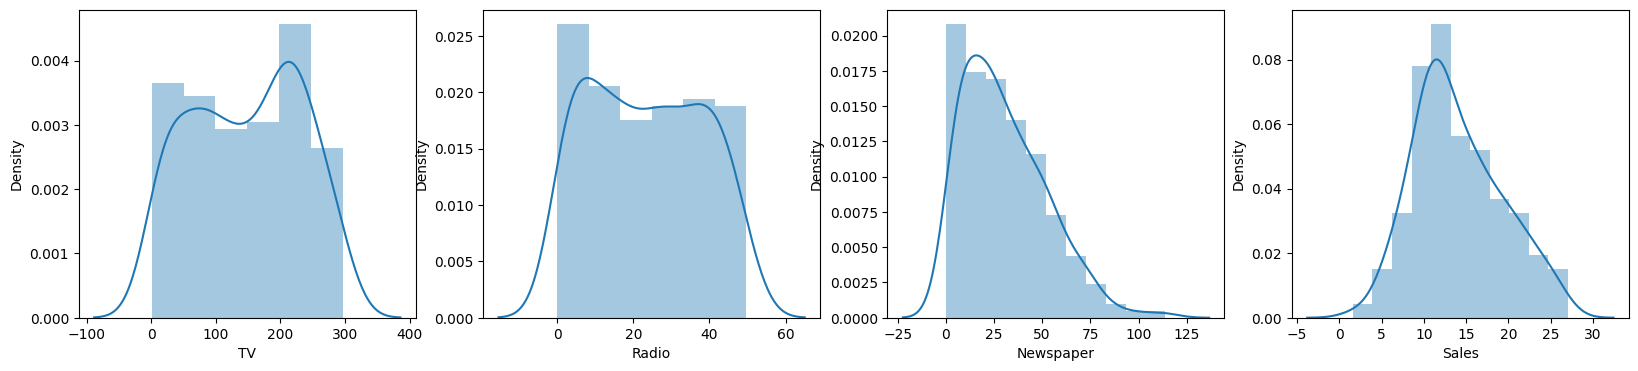

In [78]:
import warnings
warnings.filterwarnings("ignore")
# Importing seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
print("TV:",df["TV"].skew(axis=0))
print(sns.distplot(df["TV"]))

plt.subplot(1, 4, 2)
print("Radio:",df["Radio"].skew(axis=0))
print(sns.distplot(df["Radio"]))

plt.subplot(1, 4, 3)
print("Newspaper:",df["Newspaper"].skew(axis=0))
print(sns.distplot(df["Newspaper"]))

plt.subplot(1, 4, 4)
print("Sales:",df["Sales"].skew(axis=0))
print(sns.distplot(df["Sales"]))

Newspaper and Sales has normal distribution

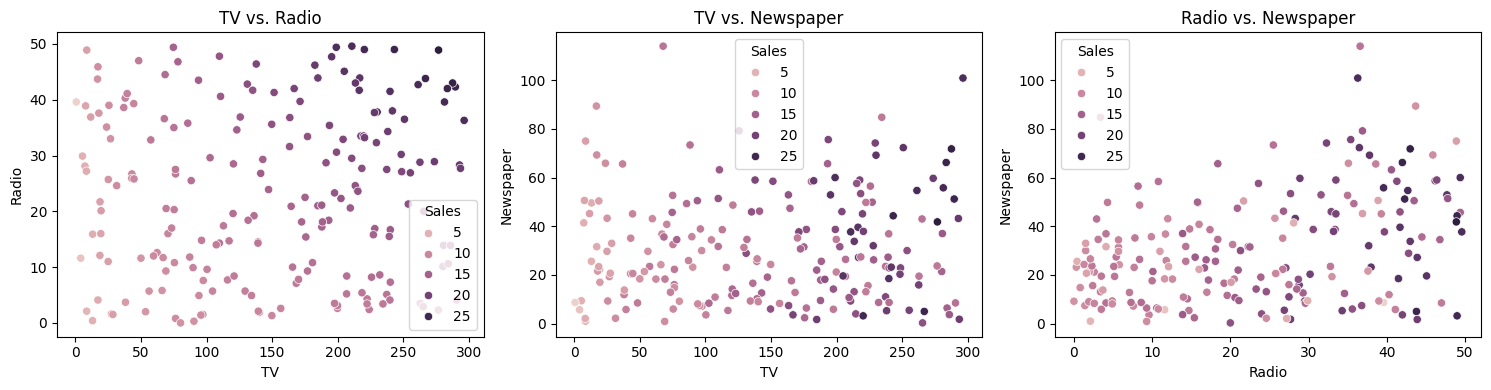

In [79]:
import matplotlib.pyplot as plt
# Create subplots
plt.figure(figsize=(20, 4))

# TV vs. Radio
plt.subplot(1, 4, 1)
sns.scatterplot(x="TV", y="Radio", hue="Sales", data=df)
plt.title("TV vs. Radio")

# TV vs. Newspaper
plt.subplot(1, 4, 2)
sns.scatterplot(x="TV", y="Newspaper", hue="Sales", data=df)
plt.title("TV vs. Newspaper")

# Radio vs. Newspaper
plt.subplot(1, 4, 3)
sns.scatterplot(x="Radio", y="Newspaper", hue="Sales", data=df)
plt.title("Radio vs. Newspaper")

plt.tight_layout()
plt.show()

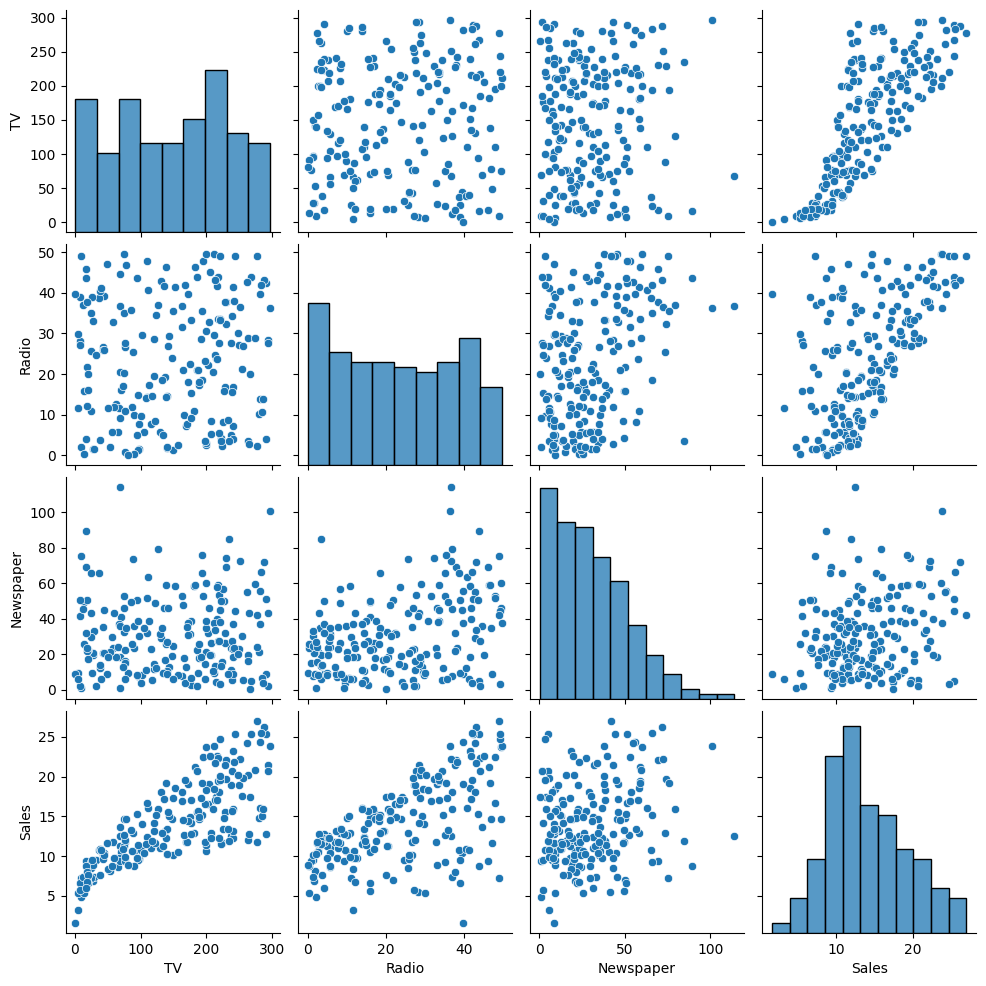

In [80]:
sns.pairplot(df)

<Axes: >

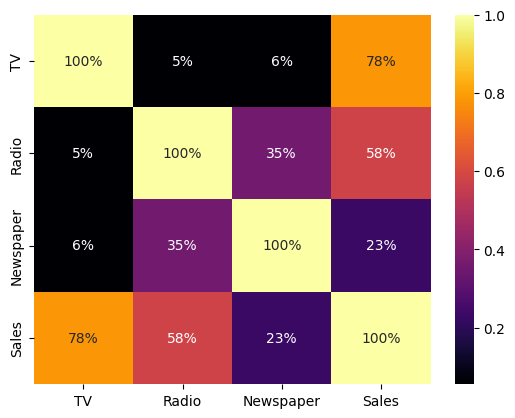

In [81]:
sns.heatmap(df.corr(),cmap='inferno',annot=True,fmt='.0%')

Checking for outliers using Box Plot

<Axes: >

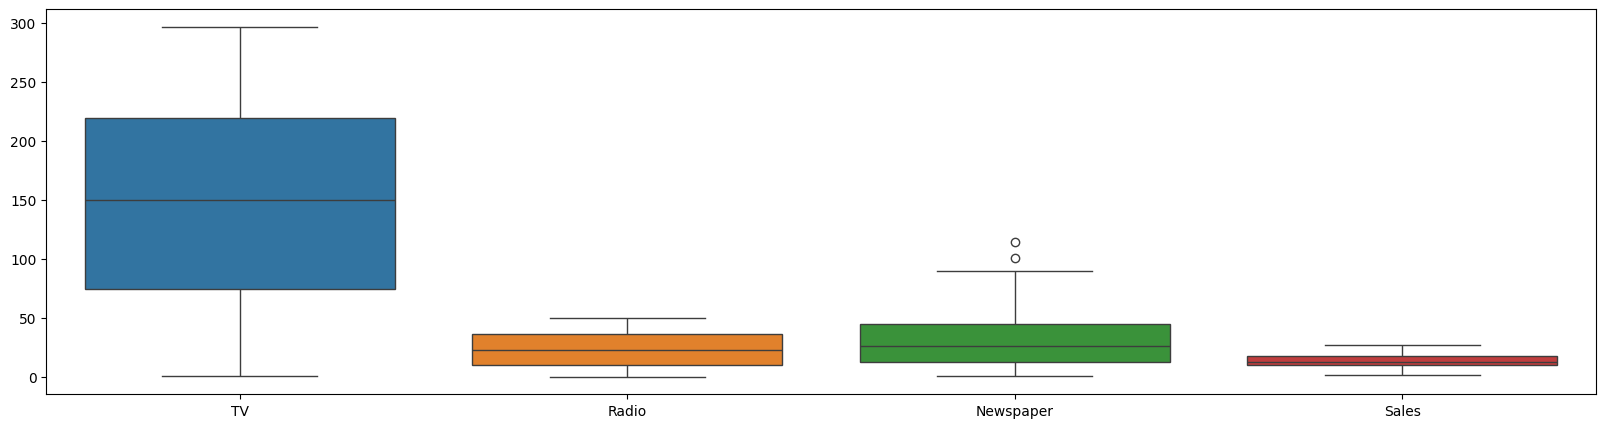

In [82]:
# Set the figure size
plt.figure(figsize=(20, 5))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

Removing outliers in Newspaper column using Z-score method.

In [83]:
# Removing outliers
from scipy import stats
z_scores = stats.zscore(df['Newspaper'])
threshold = 2  
# We can adjust this threshold as needed

outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove the outliers from the dataset
df= df[~outliers]
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[192 rows x 4 columns]


<Axes: >

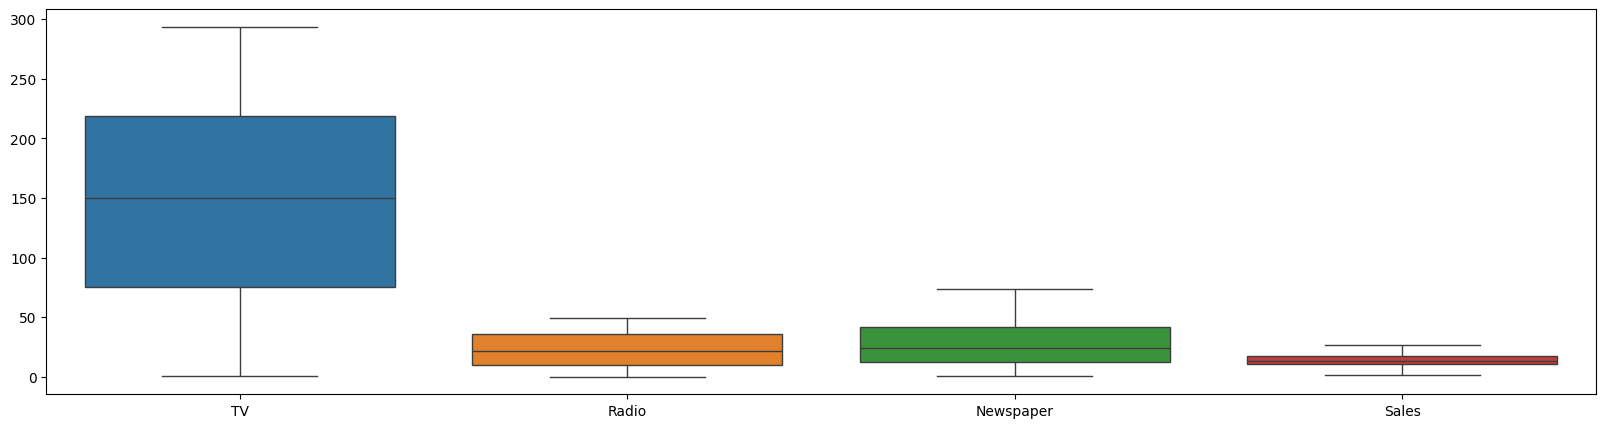

In [84]:
# Verifying whether outliers were removed or not
plt.figure(figsize=(20, 5))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

In [85]:
df.shape

(192, 4)

## 5. Splitting dataset into trainng set and testing set

In [86]:
X= df.drop(["Sales"], axis=1)
y= df["Sales"]
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [87]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [88]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 192, dtype: float64

## 6. Trainning Different ML models

In [89]:
# Importing required modules
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [90]:
# Train and evaluate a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)
print(f'Linear Regression RMSE: {lr_rmse:.4f}')

#Train and evaluate a Lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_rmse = mean_squared_error(y_test, lasso.predict(X_test), squared=False)
print(f'Lasso Regression RMSE: {lasso_rmse:.4f}')

# Train and evaluate a Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_rmse = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
print(f'Ridge Regression RMSE: {ridge_rmse:.4f}')

# Train and evaluate an ElasticNet regression model
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
elasticnet_rmse = mean_squared_error(y_test, elasticnet.predict(X_test), squared=False)
print(f'ElasticNet Regression RMSE: {elasticnet_rmse:.4f}')

# Train and evaluate a decision tree regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_rmse = mean_squared_error(y_test, dt.predict(X_test), squared=False)
print(f'Decision Tree Regression RMSE: {dt_rmse:.4f}')

# Train and evaluate a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
print(f'Random Forest Regression RMSE: {rf_rmse:.4f}')

# Train and evaluate a gradient boosting regression model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_rmse = mean_squared_error(y_test, gb.predict(X_test), squared=False)
print(f'Gradient Boosting Regression RMSE: {gb_rmse:.4f}')

# Train and evaluate a support vector regression model
svm = SVR()
svm.fit(X_train, y_train)
svm_rmse = mean_squared_error(y_test, svm.predict(X_test), squared=False)
print(f'Support Vector Regression RMSE: {svm_rmse:.4f}')

# Train and evaluate a k-nearest neighbors regression model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_rmse = mean_squared_error(y_test, knn.predict(X_test), squared=False)
print(f'k-Nearest Neighbors Regression RMSE: {knn_rmse:.4f}')

Linear Regression RMSE: 1.7362
Lasso Regression RMSE: 1.7433
Ridge Regression RMSE: 1.7362
ElasticNet Regression RMSE: 1.7419
Decision Tree Regression RMSE: 0.9686
Random Forest Regression RMSE: 0.7777
Gradient Boosting Regression RMSE: 0.7271
Support Vector Regression RMSE: 2.1300
k-Nearest Neighbors Regression RMSE: 1.7208


So here, We can see Gradient Boosting regressor has the least error means the highest accuracy of all.

In [91]:
y_pred=gb.predict(X_test)
y_pred

array([12.41470372,  9.79821808, 14.77439646, 16.47771865, 11.41183256,
        8.50767274,  8.75638489, 12.27160377, 19.7111111 , 16.09643698,
        9.75370451, 19.83332467, 10.20559657, 21.16246966, 12.38603555,
       17.47625334, 12.30079519, 15.46113953, 19.60838957, 13.1034656 ,
       21.72041822, 12.28604058, 22.5976266 , 15.13245761, 12.12346097,
       19.07037262,  9.19707308, 10.03271859, 13.10957358, 19.67572375,
       11.82925623, 14.16947863, 10.56376506,  9.87474634, 23.29642203,
       13.28420822, 18.37654868,  6.83258706, 20.17658083])

## 7. Checking the model's prediction Using random data sample

In [94]:
import random

random.seed(42)  # Setting a seed for reproducibility
sample = df[['TV', 'Radio', 'Newspaper']].sample(5)
sample

,TV,Radio,Newspaper
106,25.0,11.0,29.7
149,44.7,25.8,20.6
168,215.4,23.6,57.6
119,19.4,16.0,22.3
130,0.7,39.6,8.7


In [95]:
y_pred=gb.predict(sample)
y_pred

array([ 7.41385009,  9.87474634, 16.09643698,  6.69555899,  1.7287577 ])